<a href="https://colab.research.google.com/github/ariana-caetano/data-engineering/blob/main/BasesDemoMongoDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício Python e MongoDB**

Existem alguns dados de exemplo do próprio MongoDB que podem ser baixados e utilizados para conhecer as funcionalidades. Neste exercício foi utilizado o **sample_supplies** para treinar o que vem sendo ensinado no bootcamp de Engenharia de Dados.

# Importando Bibliotecas

In [ ]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
pd.set_option('display.max_columns',25)

# Conectando ao MongoDB

In [ ]:
uri = "mongodb+srv://bc26-aulas-ariana.vjrdjqp.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-4835143118156665007.pem'
                     )

db = client['sample_supplies']
collection = db['sales']

In [ ]:
doc_count = collection.count_documents({})
print(doc_count)

5000


# Integração com Pandas

In [ ]:
cursor = collection.find({})
df_sales = pd.DataFrame(list(cursor))

In [ ]:
df_sales.shape

(5000, 7)

In [ ]:
df_sales.head(5)

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online
1,5bd761dcae323e45a93ccfe9,2015-08-25 10:01:02.918,"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone
2,5bd761dcae323e45a93ccfea,2017-06-22 09:54:14.185,"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 51, 'email': 'worbiduh@...",False,In store
3,5bd761dcae323e45a93ccfeb,2015-02-23 09:53:59.343,"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': 45, 'email': 'vatires@t...",False,In store
4,5bd761dcae323e45a93ccfec,2017-12-03 18:39:48.253,"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': 40, 'email': 'dotzu@ib....",False,In store


In [ ]:
df_sales.dtypes

_id                       object
saleDate          datetime64[ns]
items                     object
storeLocation             object
customer                  object
couponUsed                  bool
purchaseMethod            object
dtype: object

In [ ]:
df_sales.isna().sum()

_id               0
saleDate          0
items             0
storeLocation     0
customer          0
couponUsed        0
purchaseMethod    0
dtype: int64

#Tratamento dos dados

## Transformar dados colunas em novo dataframe (customer)

A coluna customer tem uma estrutura de dicionários em cada linha da tabela.
A intensão é tranformar em um novo dataframe e fazer um merge com o dataframe principal (df_sales)

In [ ]:
df_sales.loc[0, 'customer']

{'gender': 'M', 'age': 42, 'email': 'cauho@witwuta.sv', 'satisfaction': 4}

In [ ]:
customer = df_sales['customer']
customer

0       {'gender': 'M', 'age': 42, 'email': 'cauho@wit...
1       {'gender': 'M', 'age': 50, 'email': 'keecade@h...
2       {'gender': 'M', 'age': 51, 'email': 'worbiduh@...
3       {'gender': 'F', 'age': 45, 'email': 'vatires@t...
4       {'gender': 'M', 'age': 40, 'email': 'dotzu@ib....
                              ...                        
4995    {'gender': 'F', 'age': 45, 'email': 'du@rum.py...
4996    {'gender': 'F', 'age': 47, 'email': 'dup@katje...
4997    {'gender': 'M', 'age': 29, 'email': 'losuhse@e...
4998    {'gender': 'M', 'age': 59, 'email': 'hu@pehabu...
4999    {'gender': 'M', 'age': 33, 'email': 'lihzodud@...
Name: customer, Length: 5000, dtype: object

In [ ]:
customer_dic = customer.loc[0]
customer_dic.keys()

dict_keys(['gender', 'age', 'email', 'satisfaction'])

In [ ]:
col_names = customer_dic.keys()
df_customer = pd.DataFrame(columns=col_names)

In [ ]:
for i in range(5000):
  df_customer = df_customer.append(customer.loc[i], ignore_index=True)

df_customer

,gender,age,email,satisfaction
0,M,42,cauho@witwuta.sv,4
1,M,50,keecade@hem.uy,5
2,M,51,worbiduh@vowbu.cg,5
3,F,45,vatires@ta.pe,3
4,M,40,dotzu@ib.sh,4
...,...,...,...,...
4995,F,45,du@rum.py,3
4996,F,47,dup@katjewtep.hr,3
4997,M,29,losuhse@eronehjod.np,4
4998,M,59,hu@pehabur.gd,4


### Merge entre df_sales e df_customer

In [ ]:
#ao invés de salvar os arquivos e fazer upload de novo
#talvez seja mais rápido dar o reset no index e depois fazer o merge....e depois apagar todos esse indices colocados a mais?
df_customer.reset_index(inplace=True)
df_customer

,index,gender,age,email,satisfaction
0,0,M,42,cauho@witwuta.sv,4
1,1,M,50,keecade@hem.uy,5
2,2,M,51,worbiduh@vowbu.cg,5
3,3,F,45,vatires@ta.pe,3
4,4,M,40,dotzu@ib.sh,4
...,...,...,...,...,...
4995,4995,F,45,du@rum.py,3
4996,4996,F,47,dup@katjewtep.hr,3
4997,4997,M,29,losuhse@eronehjod.np,4
4998,4998,M,59,hu@pehabur.gd,4


In [ ]:
df_sales.reset_index(inplace=True)

In [ ]:
df_sales

In [ ]:
dft = df_sales.merge(df_customer, how='outer')
dft.head(5)

,index,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod,gender,age,email,satisfaction
0,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,M,42,cauho@witwuta.sv,4
1,1,5bd761dcae323e45a93ccfe9,2015-08-25 10:01:02.918,"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone,M,50,keecade@hem.uy,5
2,2,5bd761dcae323e45a93ccfea,2017-06-22 09:54:14.185,"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 51, 'email': 'worbiduh@...",False,In store,M,51,worbiduh@vowbu.cg,5
3,3,5bd761dcae323e45a93ccfeb,2015-02-23 09:53:59.343,"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': 45, 'email': 'vatires@t...",False,In store,F,45,vatires@ta.pe,3
4,4,5bd761dcae323e45a93ccfec,2017-12-03 18:39:48.253,"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': 40, 'email': 'dotzu@ib....",False,In store,M,40,dotzu@ib.sh,4


In [ ]:
#3ª opção e mais elegante, usar join
# newdf = df_sales.join(df_customer)

## Transformar dados colunas em novo dataframe (items)

In [ ]:
col_items = ['_id','name', 'tags', 'price', 'quantity']
df_items = pd.DataFrame(columns=col_items)
df_items

,_id,name,tags,price,quantity


In [ ]:
#fiz um teste com 10 registros, pra ver se funciona e parece que sim
#aqui construo um dataframe com os itens vendidos
#depois posso fazer o merge entre o sales e o items usando o id gerado pelo mongo
for i in range(len(df_sales)):
  lista = df_sales.loc[i,'items']
  id = df_sales.loc[i,'_id']
  df = pd.DataFrame(list(lista))
  for j in range(len(df)):
    df_items = df_items.append({'_id' : id , 
                                'name' : df.loc[j,'name'], 
                                'price' : df.loc[j,'price'], 
                                'quantity':df.loc[j,'quantity'],
                                'tags':df.loc[j,'tags']} , 
                                ignore_index=True)

In [ ]:
df_items

,_id,name,tags,price,quantity
0,5bd761dcae323e45a93ccfe8,printer paper,"[office, stationary]",40.01,2
1,5bd761dcae323e45a93ccfe8,notepad,"[office, writing, school]",35.29,2
2,5bd761dcae323e45a93ccfe8,pens,"[writing, office, school, stationary]",56.12,5
3,5bd761dcae323e45a93ccfe8,backpack,"[school, travel, kids]",77.71,2
4,5bd761dcae323e45a93ccfe8,notepad,"[office, writing, school]",18.47,2
...,...,...,...,...,...
27433,5bd761deae323e45a93ce36f,envelopes,"[stationary, office, general]",24.12,5
27434,5bd761deae323e45a93ce36f,pens,"[writing, office, school, stationary]",27.1,4
27435,5bd761deae323e45a93ce36f,binder,"[school, general, organization]",29.09,3
27436,5bd761deae323e45a93ce36f,laptop,"[electronics, school, office]",598.79,2


### Merge entre df anterior e df_items

In [ ]:
df_complete = dft.merge(df_items, how='outer',on='_id')

In [ ]:
df_complete

,index,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod,gender,age,email,satisfaction,name,tags,price,quantity
0,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,M,42,cauho@witwuta.sv,4,printer paper,"[office, stationary]",40.01,2
1,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",35.29,2
2,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,M,42,cauho@witwuta.sv,4,pens,"[writing, office, school, stationary]",56.12,5
3,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,M,42,cauho@witwuta.sv,4,backpack,"[school, travel, kids]",77.71,2
4,0,5bd761dcae323e45a93ccfe8,2015-03-23 21:06:49.506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",18.47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739,"[{'name': 'envelopes', 'tags': ['stationary', ...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,M,33,lihzodud@voblep.ie,3,envelopes,"[stationary, office, general]",24.12,5
27434,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739,"[{'name': 'envelopes', 'tags': ['stationary', ...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,M,33,lihzodud@voblep.ie,3,pens,"[writing, office, school, stationary]",27.1,4
27435,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739,"[{'name': 'envelopes', 'tags': ['stationary', ...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,M,33,lihzodud@voblep.ie,3,binder,"[school, general, organization]",29.09,3
27436,4999,5bd761deae323e45a93ce36f,2014-08-18 06:25:49.739,"[{'name': 'envelopes', 'tags': ['stationary', ...",New York,"{'gender': 'M', 'age': 33, 'email': 'lihzodud@...",False,Online,M,33,lihzodud@voblep.ie,3,laptop,"[electronics, school, office]",598.79,2


Agora temos um dataframe completo em que podemos visualizar melhor as informações, que antes estavam agrupadas em formato de dicionário.

## Drop de colunas

Algumas colunas não são mais necessárias: index, _id, items, customer

In [ ]:
#bkp do dataframe
df_complete_bkp = df_complete.copy()

In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27438 entries, 0 to 27437
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           27438 non-null  int64         
 1   _id             27438 non-null  object        
 2   saleDate        27438 non-null  datetime64[ns]
 3   items           27438 non-null  object        
 4   storeLocation   27438 non-null  object        
 5   customer        27438 non-null  object        
 6   couponUsed      27438 non-null  bool          
 7   purchaseMethod  27438 non-null  object        
 8   gender          27438 non-null  object        
 9   age             27438 non-null  object        
 10  email           27438 non-null  object        
 11  satisfaction    27438 non-null  object        
 12  name            27438 non-null  object        
 13  tags            27438 non-null  object        
 14  price           27438 non-null  object        
 15  qu

In [ ]:
df_complete.drop(['index','_id', 'items','customer'], axis=1, inplace=True)

In [ ]:
df_complete

,saleDate,storeLocation,couponUsed,purchaseMethod,gender,age,email,satisfaction,name,tags,price,quantity
0,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,printer paper,"[office, stationary]",40.01,2
1,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",35.29,2
2,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,pens,"[writing, office, school, stationary]",56.12,5
3,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,backpack,"[school, travel, kids]",77.71,2
4,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",18.47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27433,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,envelopes,"[stationary, office, general]",24.12,5
27434,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,pens,"[writing, office, school, stationary]",27.1,4
27435,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,binder,"[school, general, organization]",29.09,3
27436,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,laptop,"[electronics, school, office]",598.79,2


## Tipos dos dados

In [ ]:
df_complete.dtypes

saleDate          datetime64[ns]
storeLocation             object
couponUsed                  bool
purchaseMethod            object
gender                    object
age                        int64
email                     object
satisfaction              object
name                      object
tags                      object
price                    float64
quantity                   int64
dtype: object

age - tipo inteiro

price - tipo float

quantity - tipo inteiro

In [ ]:
df_complete.age = df_complete.age.astype(int)

In [ ]:
df_complete.quantity = df_complete.quantity.astype(int)

In [ ]:
#não foi possível converter diretamente para float erro Decimal128
#a dica foi converter para str e depois para float e funcionou
df_complete.price = df_complete.price.astype(str).astype(float)

In [ ]:
df_complete.tail(20)

,saleDate,storeLocation,couponUsed,purchaseMethod,gender,age,email,satisfaction,name,tags,price,quantity
27418,2014-11-29 10:09:41.573,Denver,False,In store,F,47,dup@katjewtep.hr,3,pens,"[writing, office, school, stationary]",63.23,1
27419,2014-11-29 10:09:41.573,Denver,False,In store,F,47,dup@katjewtep.hr,3,binder,"[school, general, organization]",13.39,4
27420,2014-11-29 10:09:41.573,Denver,False,In store,F,47,dup@katjewtep.hr,3,printer paper,"[office, stationary]",35.32,1
27421,2014-11-29 10:09:41.573,Denver,False,In store,F,47,dup@katjewtep.hr,3,notepad,"[office, writing, school]",7.27,5
27422,2014-11-29 10:09:41.573,Denver,False,In store,F,47,dup@katjewtep.hr,3,pens,"[writing, office, school, stationary]",65.52,1
27423,2017-12-25 07:02:51.283,Denver,False,In store,M,29,losuhse@eronehjod.np,4,binder,"[school, general, organization]",10.81,1
27424,2017-12-25 07:02:51.283,Denver,False,In store,M,29,losuhse@eronehjod.np,4,binder,"[school, general, organization]",18.00,10
27425,2017-12-25 07:02:51.283,Denver,False,In store,M,29,losuhse@eronehjod.np,4,pens,"[writing, office, school, stationary]",26.84,5
27426,2017-12-25 07:02:51.283,Denver,False,In store,M,29,losuhse@eronehjod.np,4,notepad,"[office, writing, school]",28.33,1
27427,2017-12-25 07:02:51.283,Denver,False,In store,M,29,losuhse@eronehjod.np,4,printer paper,"[office, stationary]",14.24,4


## Filtros

###Dados estatíticos do dataframe

In [ ]:
df_complete.describe()

,age,price,quantity
count,27438.000000,27438.000000,27438.000000
mean,44.780013,113.075175,4.040637
std,14.396180,284.189435,2.476008
min,16.000000,5.000000,1.000000
25%,34.000000,15.782500,2.000000
50%,44.000000,24.610000,4.000000
75%,56.000000,45.105000,5.000000
max,75.000000,1599.490000,10.000000


### Column purchaseMethod

Total de vendas em cada canal

In [ ]:
df_complete.groupby('purchaseMethod').size()

purchaseMethod
In store    15633
Online       8584
Phone        3221
dtype: int64

Quantidade de itens vendidos por canal de venda

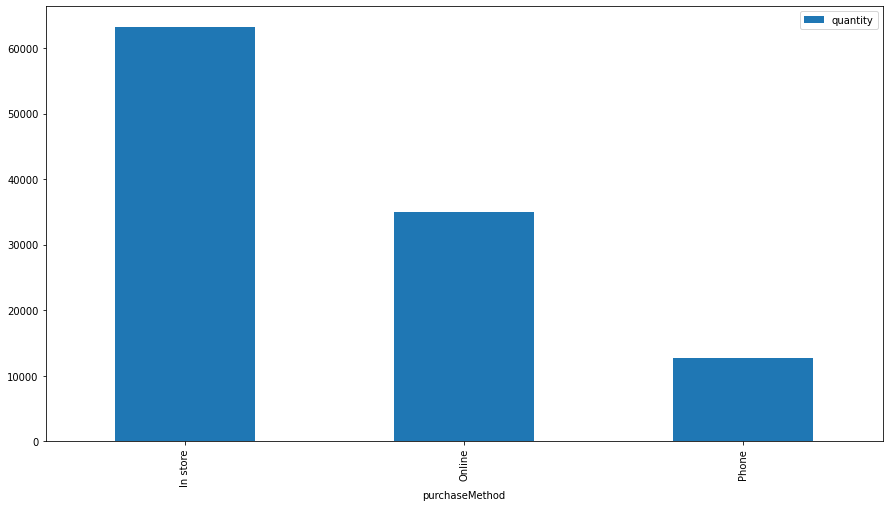

In [ ]:
#vendas por canal de venda
df_complete[['purchaseMethod',	'quantity']].groupby('purchaseMethod').sum().plot.bar(figsize=(15,8))

Valores vendidos por canal de venda

In [ ]:
#total vendido (US$)
df_complete.price.sum()

3102556.6399999997

Text(0, 0.5, 'Total de vendas (US$')

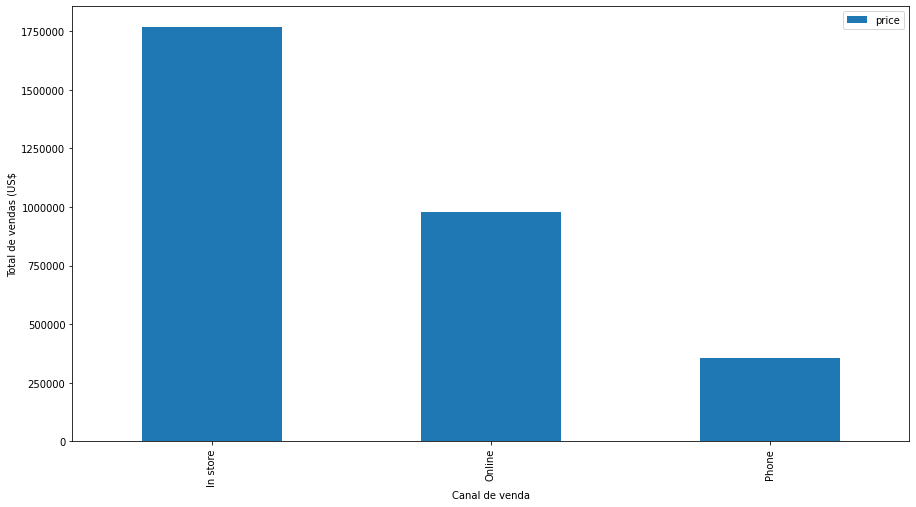

In [ ]:
df_purchase =df_complete[['purchaseMethod',	'price']].groupby('purchaseMethod').sum()
df_purchase.plot(kind='bar', figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Canal de venda')
plt.ylabel('Total de vendas (US$)')


Uma dúvida que fiquei durante a análise é se os preços são por produto, ou o total para aquele produto comprado

### Column name

Quantidade de produtos vendidos por tipo de produto

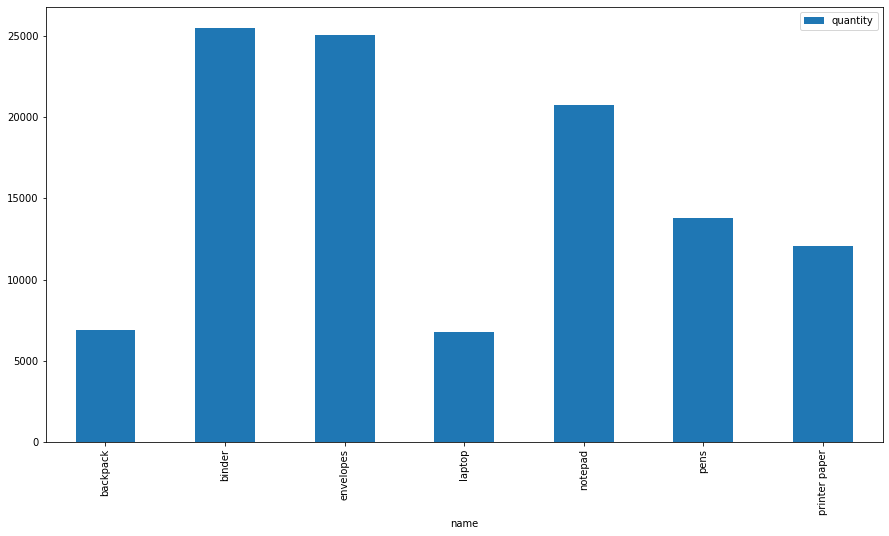

In [ ]:
#vendas por canal de venda
df_complete[['name',	'quantity']].groupby('name').sum().plot.bar(figsize=(15,8))

In [ ]:
df_complete[['name',	'price']].groupby('name').sum()

,price
name,
backpack,273404.86
binder,93648.21
envelopes,67666.09
laptop,2253177.21
notepad,154107.38
pens,192567.63
printer paper,67985.26


Text(0, 0.5, 'Total de vendas (US$)')

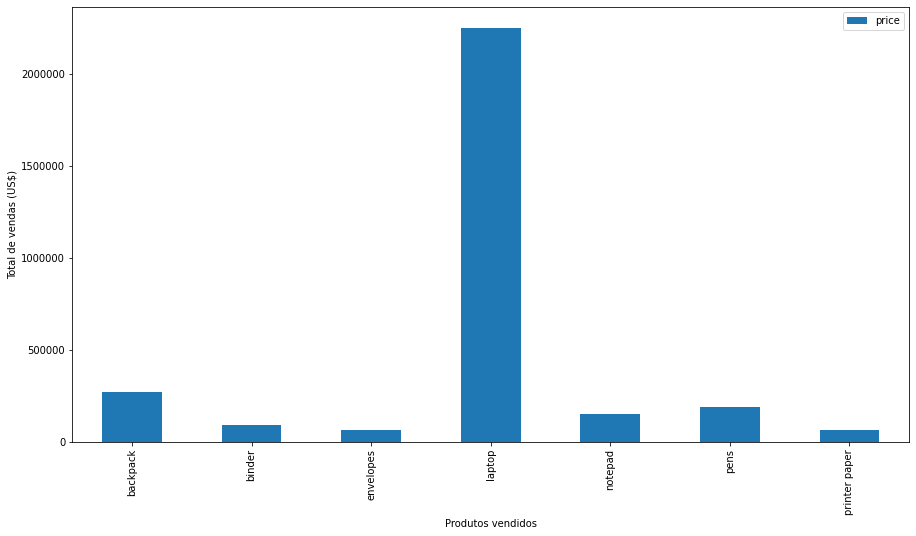

In [ ]:
df_purchase =df_complete[['name',	'price']].groupby('name').sum()
df_purchase.plot(kind='bar', figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Produtos vendidos')
plt.ylabel('Total de vendas (US$)')


### Column storeLocation

Quantidade de produtos vendidos por tipo de produto

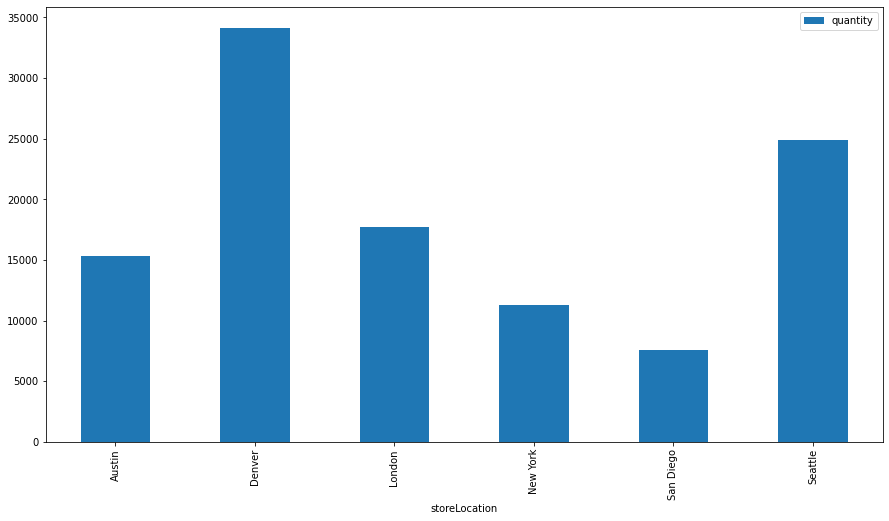

In [ ]:
#vendas por canal de venda
df_complete[['storeLocation',	'quantity']].groupby('storeLocation').sum().plot.bar(figsize=(15,8))

In [ ]:
df_complete[['storeLocation',	'price']].groupby('storeLocation').sum()

,price
storeLocation,
Austin,436116.89
Denver,929942.08
London,501452.82
New York,311750.43
San Diego,225134.90
Seattle,698159.52


Text(0, 0.5, 'Total de vendas (US$)')

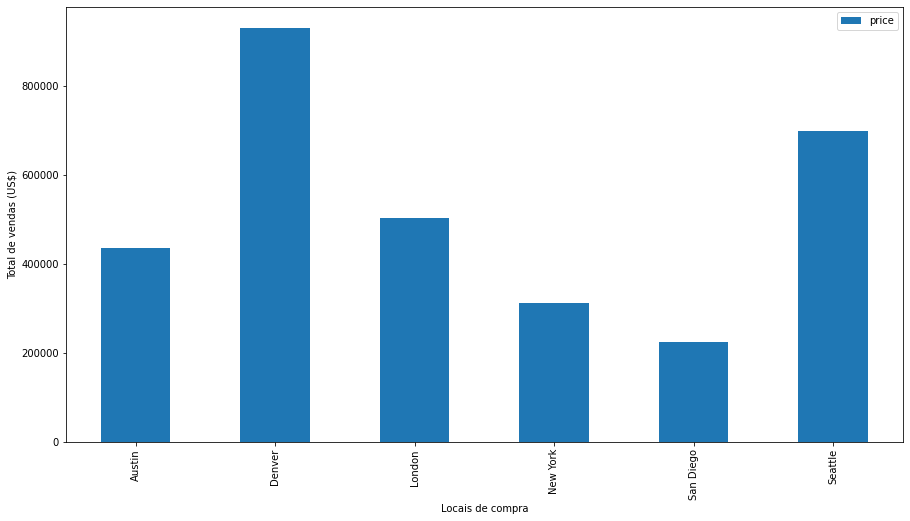

In [ ]:
df_purchase =df_complete[['storeLocation',	'price']].groupby('storeLocation').sum()
df_purchase.plot(kind='bar', figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Locais de compra')
plt.ylabel('Total de vendas (US$)')


Um cuidado importante é sobre um simples size() nas colunas: saleDate,	storeLocation,	couponUsed,	purchaseMethod,	gender,	age,	email,	satisfaction, pois essas colunas acabam sendo "duplicadas" para cada produto comprado.

### Quantidade de produtos vendidos por gênero

In [ ]:
df_complete.quantity.sum()

110867

In [ ]:
df_complete.groupby(['name','gender'])['quantity'].sum()

name           gender
backpack       F          3394
               M          3524
binder         F         12593
               M         12900
envelopes      F         12533
               M         12545
laptop         F          3472
               M          3321
notepad        F         10532
               M         10195
pens           F          7027
               M          6739
printer paper  F          6393
               M          5699
Name: quantity, dtype: int64

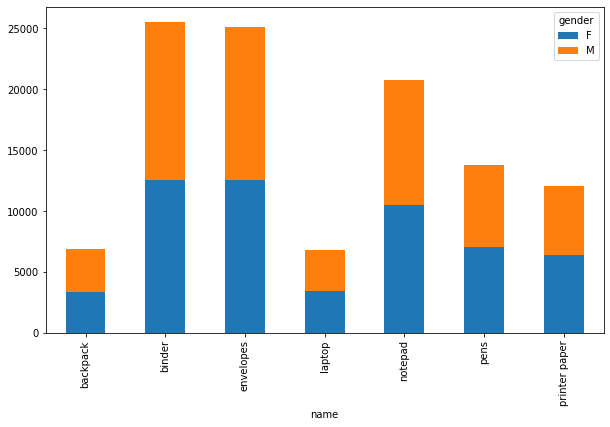

In [ ]:
df_complete.groupby(['name','gender'])['quantity'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

Em porcentagem

In [ ]:
df_complete.groupby(['name','gender'])['quantity'].sum().groupby(level=0).apply(lambda x: 100*x/x.sum())

name           gender
backpack       F         49.060422
               M         50.939578
binder         F         49.397874
               M         50.602126
envelopes      F         49.976075
               M         50.023925
laptop         F         51.111438
               M         48.888562
notepad        F         50.812949
               M         49.187051
pens           F         51.046055
               M         48.953945
printer paper  F         52.869666
               M         47.130334
Name: quantity, dtype: float64

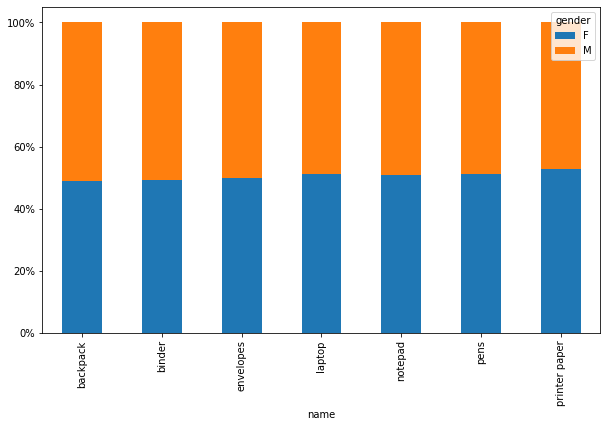

In [ ]:
df_complete.groupby(['name','gender'])['quantity'].sum().groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(10,6))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Valores vendidos por gênero

In [ ]:
df_complete.groupby(['name','gender'])['price'].sum()

name           gender
backpack       F          132384.30
               M          141020.56
binder         F           46789.44
               M           46858.77
envelopes      F           33878.35
               M           33787.74
laptop         F         1118111.69
               M         1135065.52
notepad        F           77403.41
               M           76703.97
pens           F           98005.71
               M           94561.92
printer paper  F           35624.51
               M           32360.75
Name: price, dtype: float64

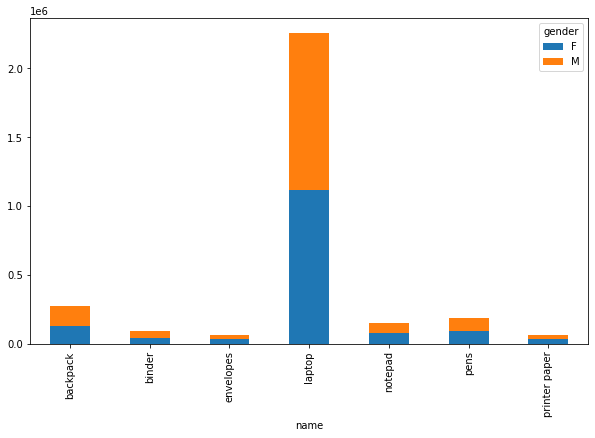

In [ ]:
df_complete.groupby(['name','gender'])['price'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

Em porcentagem

In [ ]:
df_complete.groupby(['name','gender'])['price'].sum().groupby(level=0).apply(lambda x: 100*x/x.sum())

name           gender
backpack       F         48.420610
               M         51.579390
binder         F         49.962984
               M         50.037016
envelopes      F         50.066954
               M         49.933046
laptop         F         49.623779
               M         50.376221
notepad        F         50.226933
               M         49.773067
pens           F         50.894177
               M         49.105823
printer paper  F         52.400344
               M         47.599656
Name: price, dtype: float64

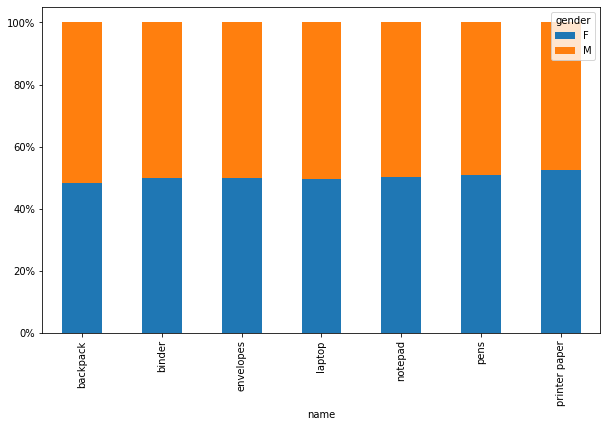

In [ ]:
df_complete.groupby(['name','gender'])['price'].sum().groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(10,6))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# Envio para o MongoDB

Envio da base tratatda para o MongoDB, e para relembrar, logo abaixo como salvar o df em csv

In [ ]:
#salvar como csv 
# df_complete.to_csv('df_sales_tratado.csv',index=False)

In [ ]:
df_complete

,saleDate,storeLocation,couponUsed,purchaseMethod,gender,age,email,satisfaction,name,tags,price,quantity
0,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,printer paper,"[office, stationary]",40.01,2
1,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",35.29,2
2,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,pens,"[writing, office, school, stationary]",56.12,5
3,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,backpack,"[school, travel, kids]",77.71,2
4,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",18.47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27433,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,envelopes,"[stationary, office, general]",24.12,5
27434,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,pens,"[writing, office, school, stationary]",27.10,4
27435,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,binder,"[school, general, organization]",29.09,3
27436,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,laptop,"[electronics, school, office]",598.79,2


In [ ]:
db_sales = client['sales']
collection_sales = db_sales['tratada']

In [ ]:
collection_sales.count_documents({})

0

In [ ]:
df_dict = df_complete.to_dict("records")

collection_sales.insert_many(df_dict)

In [ ]:
collection_sales.count_documents({})

27438

In [ ]:
for x in collection_sales.find():
  print(x)

In [ ]:
cursor = collection_sales.find({})
df_sales_tratado= pd.DataFrame(list(cursor))

In [ ]:
df_sales_tratado

,_id,saleDate,storeLocation,couponUsed,purchaseMethod,gender,age,email,satisfaction,name,tags,price,quantity
0,638bf8c8c9fbb60d1875b4b3,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,printer paper,"[office, stationary]",40.01,2
1,638bf8c8c9fbb60d1875b4b4,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",35.29,2
2,638bf8c8c9fbb60d1875b4b5,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,pens,"[writing, office, school, stationary]",56.12,5
3,638bf8c8c9fbb60d1875b4b6,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,backpack,"[school, travel, kids]",77.71,2
4,638bf8c8c9fbb60d1875b4b7,2015-03-23 21:06:49.506,Denver,True,Online,M,42,cauho@witwuta.sv,4,notepad,"[office, writing, school]",18.47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,638bf8c8c9fbb60d18761fdc,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,envelopes,"[stationary, office, general]",24.12,5
27434,638bf8c8c9fbb60d18761fdd,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,pens,"[writing, office, school, stationary]",27.10,4
27435,638bf8c8c9fbb60d18761fde,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,binder,"[school, general, organization]",29.09,3
27436,638bf8c8c9fbb60d18761fdf,2014-08-18 06:25:49.739,New York,False,Online,M,33,lihzodud@voblep.ie,3,laptop,"[electronics, school, office]",598.79,2
